# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin OR BTC",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)

In [6]:
print(f"Total BTC articles: {btc_headlines['totalResults']}")
print(f"Total ETH articles: {eth_headlines['totalResults']}")

Total BTC articles: 4959
Total ETH articles: 1276


In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]
btc_df.head()

,compound,negative,neutral,positive,text
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...
3,-0.5859,0.103,0.897,0.000,Illustration by Grayson Blackmon / The Verge\r...
4,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text":text,
            "date":date,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
eth_df = eth_df[cols]
eth_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.177984,0.018316,0.918368,0.063316
std,0.315853,0.033726,0.077394,0.065943
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.869000,0.000000
50%,0.102700,0.000000,0.923000,0.050000
75%,0.421150,0.020500,1.000000,0.123500
max,0.765000,0.103000,1.000000,0.171000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.104105,0.023400,0.919550,0.057050
std,0.299717,0.054531,0.104663,0.076081
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.881750,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.232225,0.000000,1.000000,0.087250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest negative score.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [12]:
# Expand the default stopwords list if necessary
sw_addons = {"reuters", "staffa","youve", "file","photo", "chars"}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Create a list of the words
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens


In [14]:
# Create a new tokens column for bitcoin

btc_df["tokens"] = btc_df.apply(lambda x:
                               tokenizer(x.text), axis=1
                               )

btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[watching, crypto, market, past, week, youll, ..."
1,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[representation, virtual, currency, bitcoin, s..."
2,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nA representation of virtua...,"[representation, virtual, currency, bitcoin, s..."
3,-0.5859,0.103,0.897,0.000,Illustration by Grayson Blackmon / The Verge\r...,"[illustration, grayson, blackmon, verge, one, ..."
4,0.0000,0.000,1.000,0.000,Keep an eye out today — we may see the first h...,"[keep, eye, today, may, see, first, highaltitu..."


In [15]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df.apply(lambda x:
                               tokenizer(x.text), axis=1
                               )
    
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, institutional, investor, pumped, m..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, institutional, investor, pumped, m..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2

N = 2

btc_grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(btc_grams).most_common(20)

[(('york', 'bitcoin'), 4),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('illustration', 'taken'), 3),
 (('highest', 'level'), 3),
 (('digital', 'currency'), 2),
 (('charsby', 'representation'), 2),
 (('representation', 'virtual'), 2),
 (('seen', 'illustration'), 2),
 (('taken', 'november'), 2),
 (('november', 'reutersdado'), 2),
 (('reutersdado', 'ruvicillustrationnew'), 2),
 (('ruvicillustrationnew', 'york'), 2),
 (('bitcoin', 'btcbtsp'), 2),
 (('btcbtsp', 'rose'), 2),
 (('rose', 'n'), 2),
 (('bitcoin', 'passed'), 2),
 (('bitcoin', 'tuesday'), 2),
 (('tuesday', 'soared'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
# eth_df = np.concatenate([np.ravel(bag) for bag in eth_df["Tokens"]])

eth_grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(eth_grams).most_common(20)

[(('virtual', 'currency'), 9),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'illustration'), 5),
 (('representation', 'virtual'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('november', 'reutersdado'), 5),
 (('charsby', 'stafffile'), 4),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3),
 (('reutersdado', 'ruvicillustrationlondon'), 3),
 (('stafffile', 'representation'), 3),
 (('reutersdado', 'ruvicillustrationfile'), 3),
 (('currency', 'standing'), 2),
 (('standing', 'pc'), 2),
 (('pc', 'motherboard'), 2),
 (('motherboard', 'seen'), 2),
 (('illustration', 'picture'), 2),
 (('picture', 'february'), 2)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
all_btc_tokens =  tokenizer(btc_df.text.str.cat())
token_count(all_btc_tokens)

[('bitcoin', 13),
 ('york', 6),
 ('currency', 5),
 ('taken', 5),
 ('november', 5),
 ('ha', 5),
 ('year', 4),
 ('soared', 4),
 ('since', 4),
 ('asset', 4)]

In [22]:
# Get the top 10 words for Ethereum
all_eth_tokens =  tokenizer(eth_df.text.str.cat())
token_count(all_eth_tokens)

[('bitcoin', 13),
 ('currency', 10),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7),
 ('taken', 7),
 ('charsby', 6),
 ('ethereum', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

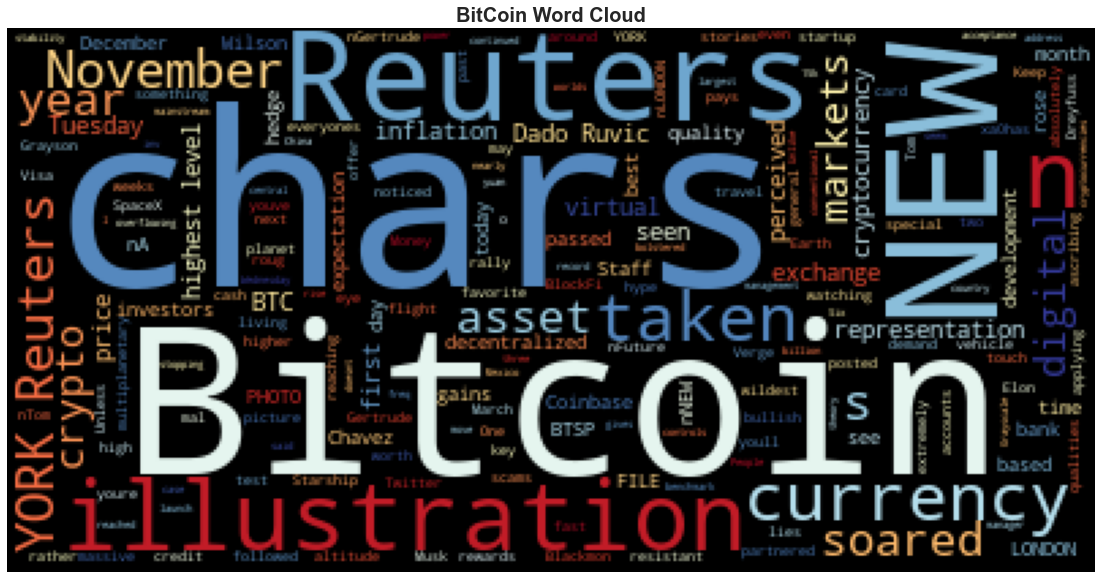

In [24]:
# Generate the Bitcoin word cloud
terms_list_btc = str(btc_df["text"].tolist())

wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list_btc)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("BitCoin Word Cloud", fontdict=fontdict)
plt.show()


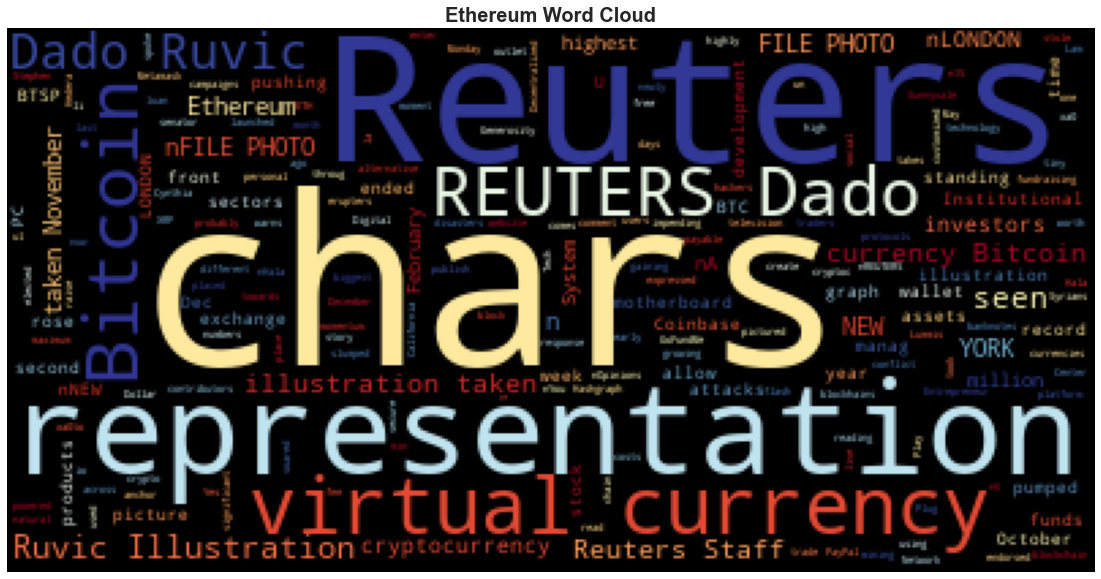

In [25]:
# Generate the Ethereum word cloud
terms_list_eth = str(eth_df["text"].tolist())

wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list_eth)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_btc_text = btc_df.text.str.cat()
all_btc_text

"If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1388 chars]Illustration by Grayson Blackmon / The Verge\r\n\n \n\n One of the wildest stories of the year was the day some of the most-followed Twitter accounts on the planet posted cryptocurrency scams because of a… [+4340 chars]Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the ke

In [31]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [32]:
# Render the visualization
displacy.render(doc, style='ent', jupyter= True)

In [33]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Grayson Blackmon / PERSON
One CARDINAL
the year DATE
the day DATE
Twitter ORG
today DATE
first ORDINAL
Elon Musk ORG
Earth LOC
first ORDINAL
Bitcoin GPE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
Reuters ORG
Bitcoin GPE
17,000 MONEY
Tuesday DATE
this year DATE
Reuters ORG
Bitcoin GPE
Tuesday DATE
December 2017 DATE
YORK PERSON
Reuters ORG
Grayscale ORG
Wednesday DATE
a record $10.4 billion MONEY
nearly three years DATE
Bitcoin GPE
over $15k MONEY
BTC ORG
New Bitcoin GPE
digital yuan ORG
the People’s Bank of China ORG
chars]Six years DATE
Mexico GPE
$62 mill

---

## Ethereum NER

In [35]:
# Concatenate all of the ethereum text together
all_eth_text = eth_df.text.str.cat()
all_eth_text

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars]NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the se

In [36]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [37]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter= True)

In [38]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
15, 2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Hedera ORG
Syrians N